## Word2Vec:-

In [1]:
import gensim
import numpy as np

In [2]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

In [3]:
attributes = ["happy", "unhappy", "friendly", "unfriendly", "sociable", "introverted", "attractive", 
             "unattractive", "kind", "mean", "caring", "cold", "trustworthy", "untrustworthy", 
              "responsible", "irresponsible", "confident", "uncertain", "humble",
             "egotistic", "emotionally stable", "emotionally unstable", "normal", "weird", 
              "intelligent", "unintelligent", "interesting", "boring", "calm", 
              "aggressive", "emotional", "unemotional", "memorable", "forgettable", 
              "typical", "atypical", "common", "uncommon", "familiar", "unfamiliar"]

In [17]:
word2vec  = []
feat_cols = []

for word in attributes:
    if word in model:
        word2vec.append(model[word])
        feat_cols.append(word)
    else:
        print('"{0}" is an out of dictionary word'.format(word))

"emotionally stable" is an out of dictionary word
"emotionally unstable" is an out of dictionary word


In [18]:
word2vec = np.array(word2vec)
word2vec.shape

(38, 300)

### PCA:-

In [19]:
from sklearn.decomposition import PCA
def pca(X, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(X)
    print(pca_result.shape)
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    return pca_result

In [20]:
pca_result = None
pca_result = pca(word2vec, 20)

(38, 20)
Explained variation per principal component: [0.09377836 0.08288878 0.07041353 0.06116173 0.0562975  0.0522081
 0.04324778 0.04125974 0.03979805 0.03628973 0.03390886 0.03126096
 0.0297977  0.0284427  0.02607307 0.02419503 0.02321743 0.01966035
 0.01931284 0.01884946]


### TSNE (t-distributed Stochastic Neighbor Embedding) :-

In [21]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(pca_result)
X_embedded.shape

(38, 2)

### Normalization:-

In [22]:
from sklearn.preprocessing import normalize
normed_matrix = normalize(X_embedded, axis=1, norm='l1')

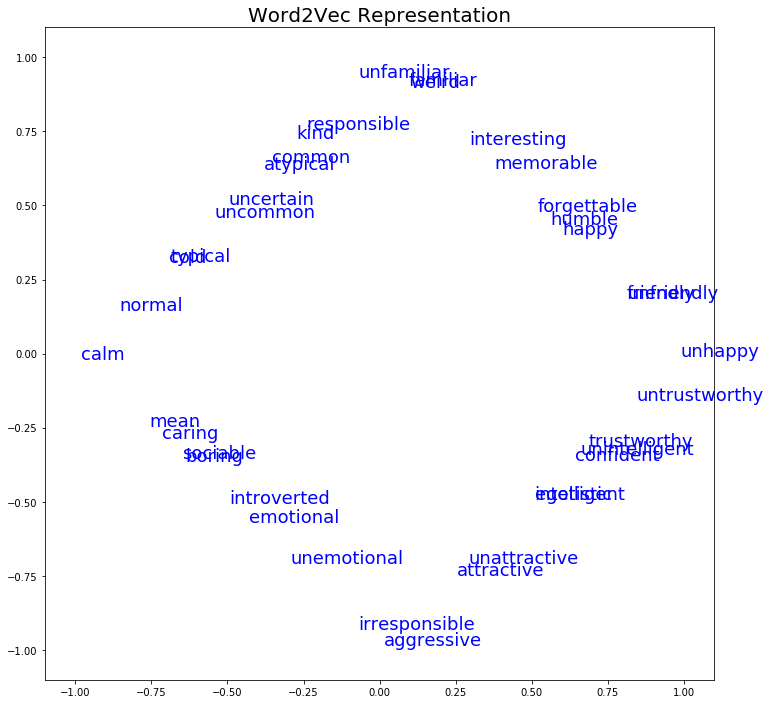

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
for ind, word in enumerate(feat_cols):
    x, y = normed_matrix[ind, :]   
    plt.text(x, y, word, fontsize=18, color="blue")
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.title("Word2Vec Representation", fontsize=20) 
    plt.savefig("Word2Vec Representation")

# Impression Rating Matrix:-

In [11]:
import pandas as pd
xls = pd.ExcelFile("psychology-attributes.xlsx")
sheetX = xls.parse(1) #2 is the sheet number

In [12]:
X = []  # 40*2222
feat_cols = []
for word in attributes:
    try:
        column = sheetX[word]
        X.append(column)
        feat_cols.append(word)
    except:
        print(word)
    
X = np.array(X)
X.shape

emotionally stable
emotionally unstable


(38, 2222)

### PCA:-

In [13]:
pca_result = None
pca_result = pca(X, 2)

(38, 2)
Explained variation per principal component: [0.78131778 0.05024164]


### TSNE (t-distributed Stochastic Neighbor Embedding) :-

In [14]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(pca_result)
X_embedded.shape

(38, 2)

### Normalization :-

In [15]:
from sklearn.preprocessing import normalize
normed_matrix = normalize(X_embedded, axis=1, norm='l1')

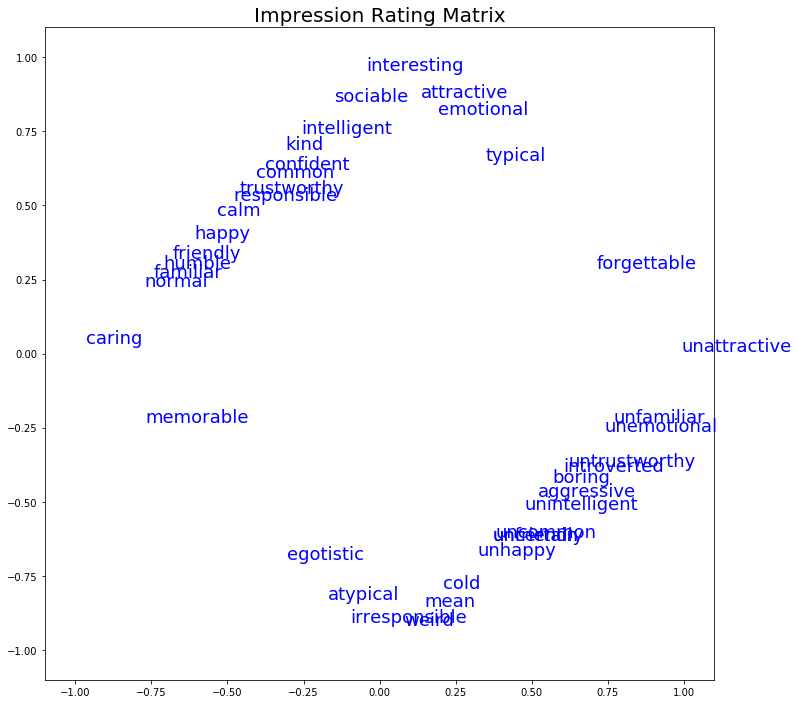

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
for ind, word in enumerate(feat_cols):
    x, y = normed_matrix[ind, :]
    
    plt.text(x, y, word, fontsize=18, color="blue")
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    plt.title("Impression Rating Matrix", fontsize=20)
    plt.savefig("Impression_Rating_Matrix_Visualization")